## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

## ポアソン混合モデルからデータ生成

In [6]:
X1=np.random.poisson(lam=10,size=100)
X2=np.random.poisson(lam=20,size=100)
X=np.concatenate([X1,X2])

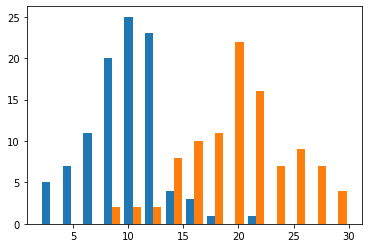

In [7]:
plt.hist([X1,X2],bins=15);

## ギブスサンプリング

In [8]:
def make_sum_one(x:np.array)->np.array:
    """配列の和を1にする"""
    return x/x.sum()

In [9]:
#setting
K=2
iter_num=1000

In [10]:
#メモリ確保
s=np.ones((iter_num,len(X),K))
lam=np.ones((iter_num,K))
pi=np.ones((iter_num,K))

In [11]:
#初期値
lam[0,:]=np.random.rand(K)
pi[0,:]=[0.5,0.5]
#事前分布のパラメータ
a=1
b=1
alpha=np.ones(K)

In [12]:
def gibbs_sampling():
    for i in tqdm(range(1,iter_num)):
        for n in range(len(X)):
            eta=make_sum_one(np.exp(X[n]*np.log(lam[i-1])-lam[i-1]+np.log(pi[i-1])))
            s[i,n,:]=np.random.multinomial(1, eta)
        for k in range(K):
            a_hat=(s[i,:,k]*X).sum()+a
            b_hat=(s[i,:,k]).sum()+b
            lam[i,k]=np.random.gamma(shape=a_hat,scale=1/b_hat)
        alpha_hat=s[i,:,:].sum(axis=0)+alpha
        pi[i,:]=np.random.dirichlet(alpha_hat)
    return s[1:,:,:],lam[1:,:],pi[1:,:]

In [13]:
s,lam,pi=gibbs_sampling()

100%|██████████| 999/999 [00:04<00:00, 219.37it/s]


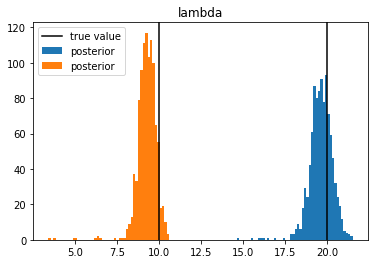

In [14]:
fig,ax=plt.subplots()
ax.hist(lam[:,0],bins=50,label="posterior");
ax.hist(lam[:,1],bins=50,label="posterior");
ax.axvline(20,color="black",label="true value")
ax.axvline(10,color="black")
ax.set_title("lambda")
ax.legend();